### The dataset is from kaggle its link is

"https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification"

In [1]:
#imports  
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import torch
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import os
import tarfile
import urllib.request

In [2]:
#reading data
data = pd.read_csv("fetal_health.csv")

#checking the shape of the dataset
data.shape


(2126, 22)

In [3]:

#checking the columns present in the dataframe
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<b>There are no null values so we can continue furthure</b>

In [8]:
import plotly.express as px
# The next is to learn how the data is related to the target variable
# Iterate through each column in the DataFrame
for col in data.columns[:-1]:
    # Create a histogram for the column
    fig = px.box(data, x="fetal_health", y=col,color='fetal_health',title=f"corelation between fetal_health and {col}")
    fig.show()

The above code is to visually explore the relationship between each feature (column) in the dataset and the target variable. 


<AxesSubplot:>

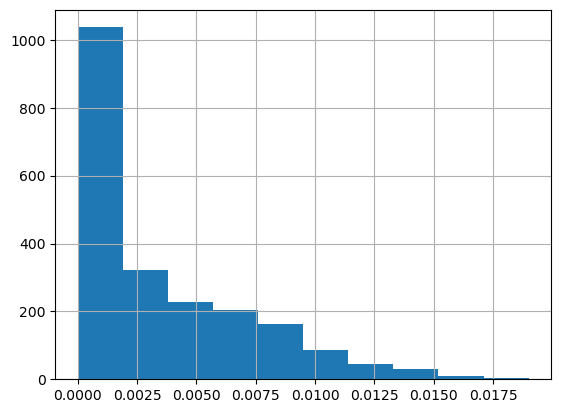

In [19]:
data["accelerations"].hist()

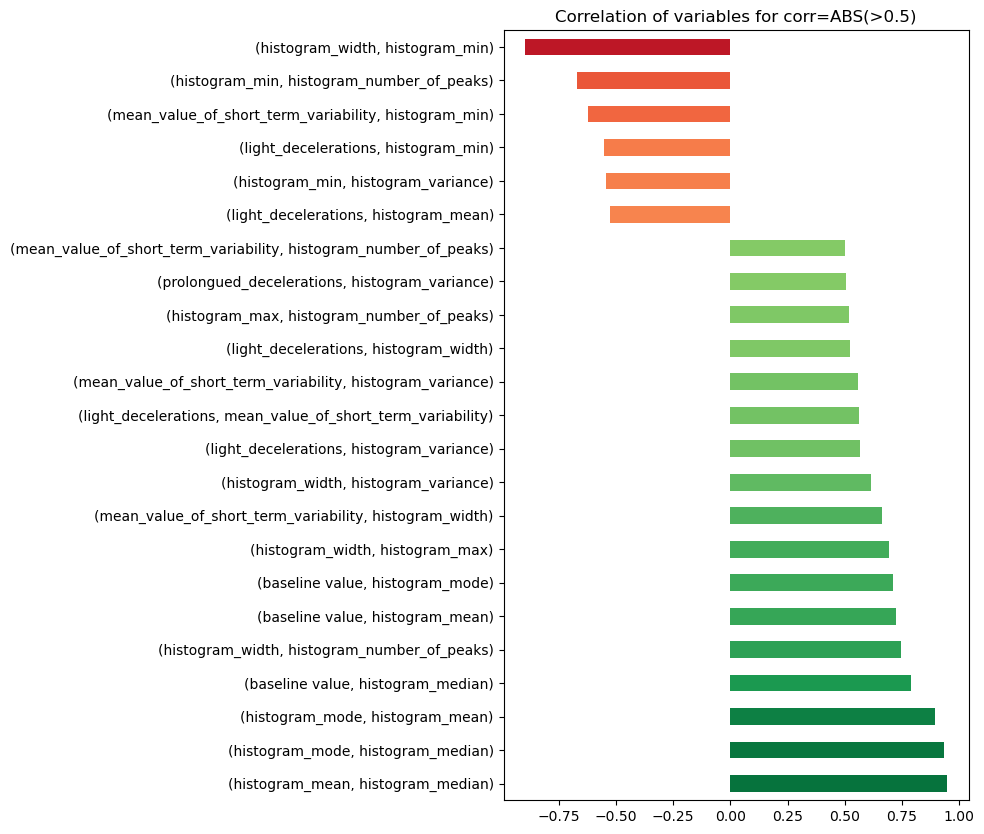

In [9]:
# Exploring the correlation between variables
df = data
# Remove redundant pairs
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
        #for i in range(0, df.shape[1]):
        #    pairs_to_drop.add((cols[i], cols[i]))
    return pairs_to_drop

# Get correlations - unstack the correlations matrix
def get_correlation(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

# get correlations
corrplot = get_correlation(df)

# filtering out the values  higher/lower than |0.1|
filtered_corrplot = corrplot.loc[lambda x: (x < -0.5) | (x > 0.5)]

## Bar plot for the correlations list
from matplotlib.colors import TwoSlopeNorm
fig = plt.figure(figsize=(6,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in filtered_corrplot.values]
filtered_corrplot.plot.barh(color=colors)
plt.title("Correlation of variables for corr=ABS(>0.5)")
plt.show()

The EDA shows that:
1) This dataset contains 21 features and 1 target variable (3 different classes).
2) Several features are not normally distributed.
3) There are many features with lots of zeroes.
4) Some features are strongly correlated.
5) Pathological examples seem to be more different than the normal when compared to the suspect cases.
6) The data is unbalanced, which will require the creation of balanced datasets before proceeding into the creation of models.

## Unvariated Analysis

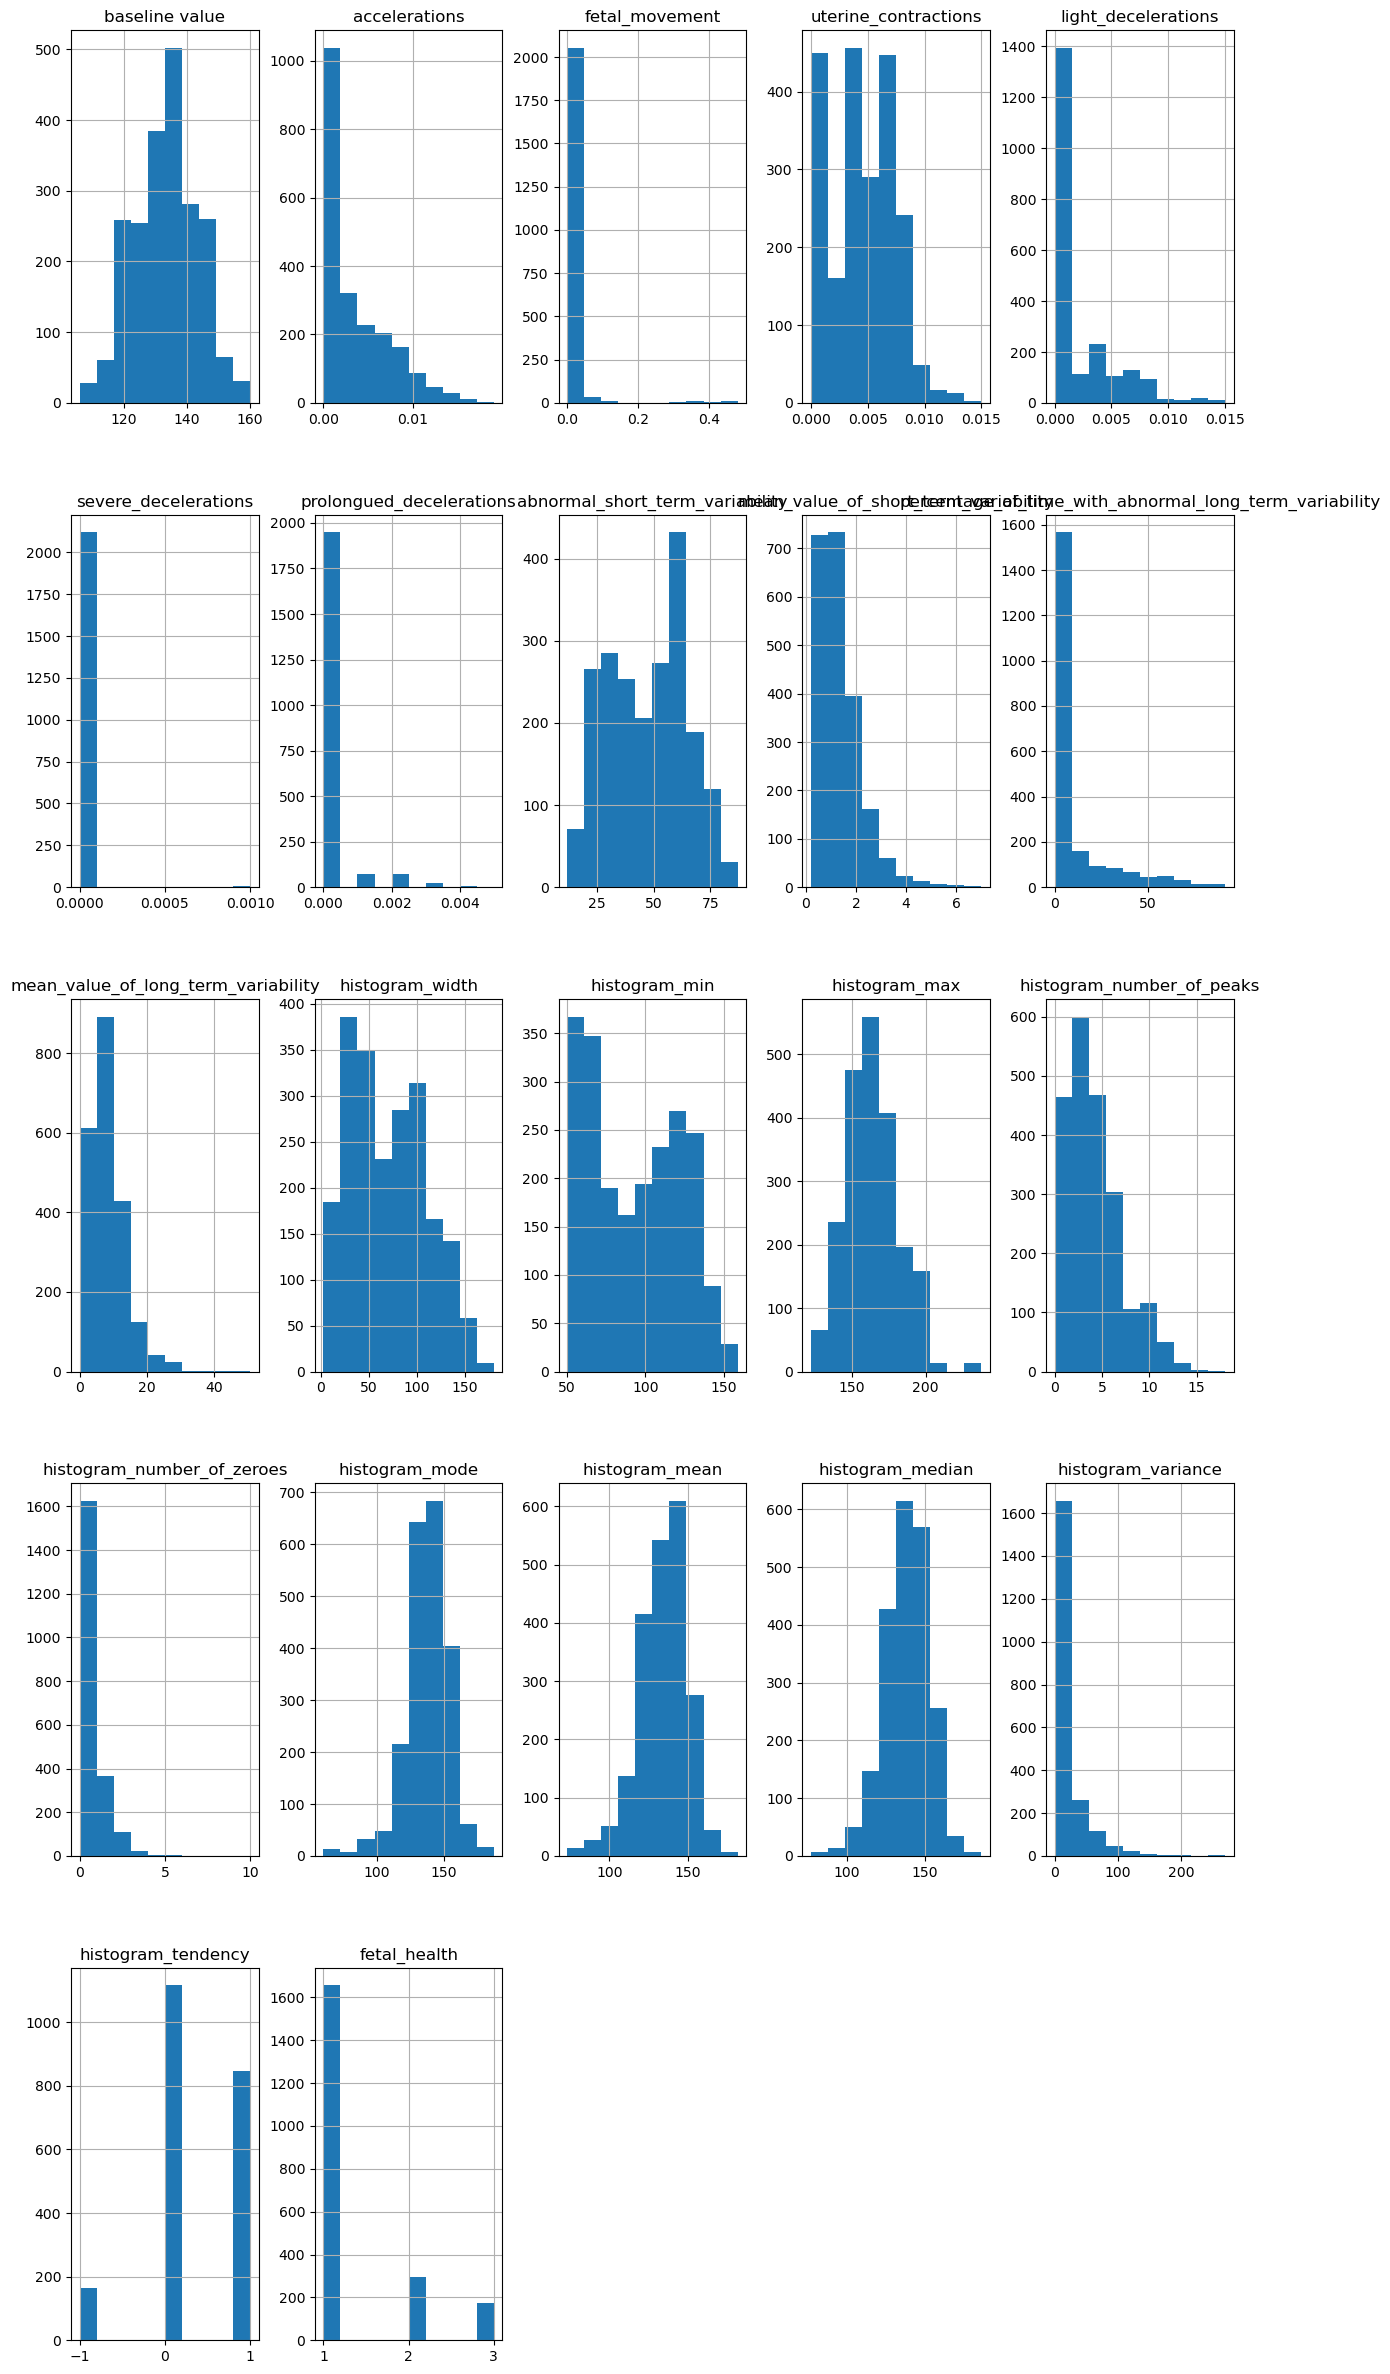

In [10]:
import pandas as pd 
data = pd.read_csv("fetal_health.csv")
df = data
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(15,30))
plt.show()

## Dividing Data into Training Test

In [11]:

# import torch
# #dropping the target columns from X
# X = data.drop(['fetal_health'],axis=1)
# X = torch.tensor(X.values.astype(float))



# dropping the target columns from X
X = data.drop(['fetal_health'], axis=1)

# converting X to a NumPy array of float values
X = np.array(X.values, dtype=float)

In [12]:
#creating the Target Column
Y = data['fetal_health'].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
#splitting the dataset into train and test with 30% of test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1488, 21)
X_test shape: (638, 21)
y_train shape: (1488,)
y_test shape: (638,)


## LOGISTIC REGRESSION



For the amounts of training data is:  <function size at 0x000001C3D5DDB9D0>
Accuracy of LogisticRegression:  0.8730407523510971


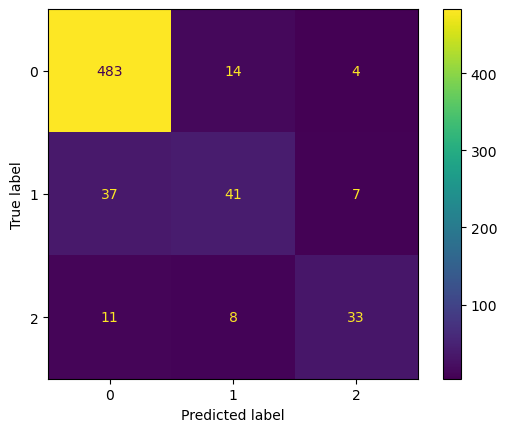

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import size
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Training using the Logistic Regression
model = LogisticRegression(max_iter=1000, C=0.009, penalty="l2", solver="newton-cg") 
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of LogisticRegression: ",model.score(X_test,y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## DecisionTreeClassifier

For the amounts of training data is:  <function size at 0x000001C3D5DDB9D0>
Accuracy of DecisionTree:  0.9122257053291536


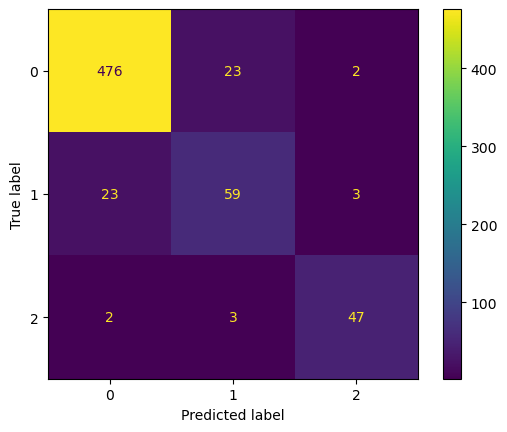

In [15]:
#training using the Decision Tree Classifier
model = DecisionTreeClassifier()
#fitting the Model with X_train and y_train
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
#calculating the accuracy score
print("Accuracy of DecisionTree: ",model.score(X_test, y_test))
#predicting the unseen examples or test set 
y_pred = model.predict(X_test)

# creating the confusin_matrix 
cm = confusion_matrix(y_test, y_pred)
#plotting the confusin_matrix and displaying using the matplotlib
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## KNeighborsClassifier


For the amounts of training data is:  <function size at 0x000001C3D5DDB9D0>
Accuracy of K-NN: 0.8840125391849529


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



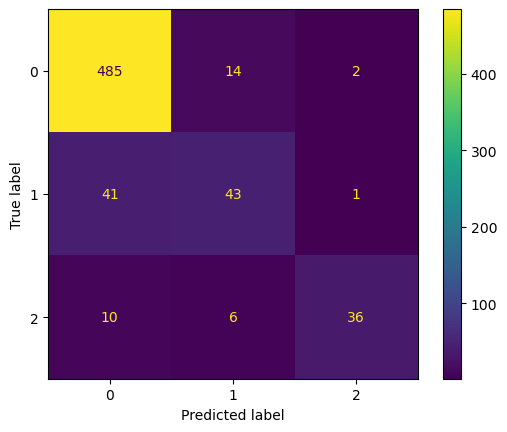

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#Training using the KNeighbors Classifier
model = KNeighborsClassifier(n_neighbors=5)
#fitting the Model with X_train and y_train
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
#calculating the accuracy score
print("Accuracy of K-NN:",model.score(X_test, y_test))
#predicting the unseen examples or test set 
y_pred = model.predict(X_test)
# creating the confusin_matrix 
cm = confusion_matrix(y_test, y_pred)
#plotting the confusin_matrix and displaying using the matplotlib
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## RandomForestClassifier

For the amounts of training data is:  <function size at 0x000001C3D5DDB9D0>
Accuracy of RandomForestClassifier: 0.9404388714733543


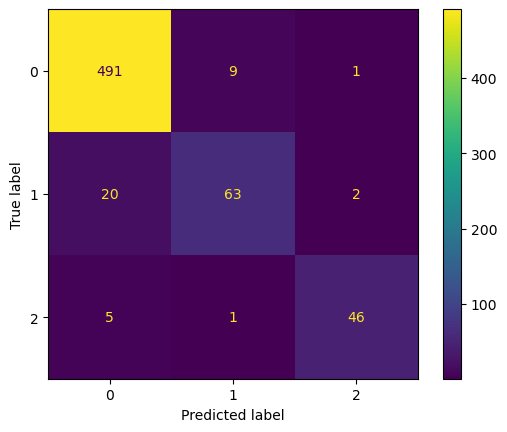

In [17]:

from sklearn.ensemble import RandomForestClassifier
#Training using the RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
#fitting the Model with X_train and y_train
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
#calculating the accuracy score
print("Accuracy of RandomForestClassifier:",model.score(X_test, y_test))
#predicting the unseen examples or test set 
y_pred = model.predict(X_test)
# creating the confusin_matrix 
cm = confusion_matrix(y_test, y_pred)
#plotting the confusin_matrix and displaying using the matplotlib
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# load dataset into pandas DataFrame
df = pd.read_csv('fetal_health.csv')

# define target variable
y = df['fetal_health']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# evaluate model performance
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9225352112676056
